In [8]:
# Import package for getting dataset example
import wooldridge as woo

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

import math

# Simple OLS Regression

We are concerned with estimating the population parameters $ \beta_0 $ and $ \beta_1 $ of the simple linear regression model:

$$
y = \beta_0 + \beta_1 x
$$

from a random sample of $ y $ and $ x $. According to Wooldridge (2019, Section 2.2), the ordinary least squares (OLS) estimators are:

$$
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}
$$

$$
\hat{\beta}_1 = \frac{\text{Cov}(x, y)}{\text{Var}(x)}
$$

Where:
- $ \bar{x} $ = Average of independent x 
- $ \bar{y} $ = Average of dependent y
- $ \hat{\beta}_0 $ and $ \hat{\beta}_1 $ = Sample parameters model

![images](images/Example_2-3.png)

In [11]:
# Extract data
ceosal1 = woo.dataWoo('ceosal1')
x = ceosal1['roe']
y = ceosal1['salary']

# Ingredients to OLS formulas
x_bar = np.mean(x)
y_bar = np.mean(y)
cov_xy = np.cov(x, y)[0, 1]
var_x = np.var(x, ddof=1)

# Estimates parameter
beta_1 = cov_xy / var_x
beta_0 = y_bar - beta_1 * x_bar

print(f"Estimated slope = {round(beta_1, 3)} and intercept = {round(beta_0, 3)}")

Estimated slope = 18.501 and intercept = 963.191


In [12]:
# Alternative using stats.formula.api

reg = smf.ols(formula='salary ~ roe', data=ceosal1)
results = reg.fit()
params = results.params

print("Parameters:")
print(params)

Parameters:
Intercept    963.191336
roe           18.501186
dtype: float64


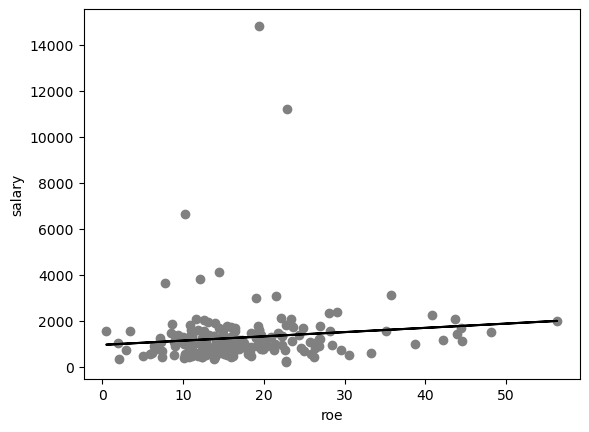

In [14]:
# Scatter plot
y_fit = results.fittedvalues

plt.plot('roe', 'salary', data=ceosal1, color='grey', marker='o', linestyle='')
plt.plot(ceosal1['roe'], y_fit, color='black', linestyle='-')
plt.ylabel('salary')
plt.xlabel('roe')
plt.show()

![images](images/Example_2-4.png)

Parameters:
Intercept   -0.904852
educ         0.541359
dtype: float64


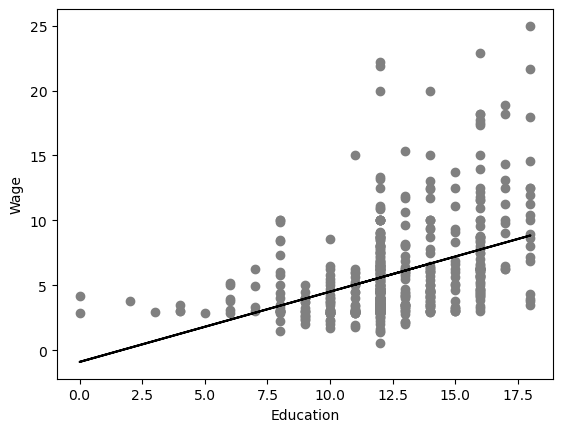

In [29]:
# Extract data
wage1 = woo.dataWoo('wage1')
# x = wage1['educ']
# y = wage1['wage']

# Modeling
reg = smf.ols(formula='wage ~ educ', data=wage1)
model = reg.fit()

# Get params
params = model.params
print("Parameters:")
print(params)

# Plot scatter
y_fitted = model.fittedvalues
plt.plot('educ', 'wage', data=wage1, color='grey', marker='o', linestyle='')
plt.plot(wage1['educ'], y_fitted, color='black', linestyle='-')
plt.ylabel('Wage')
plt.xlabel('Education')
plt.show()

![images](images/Example_2-5.png)

Parameters:
Intercept    26.812214
shareA        0.463827
dtype: float64


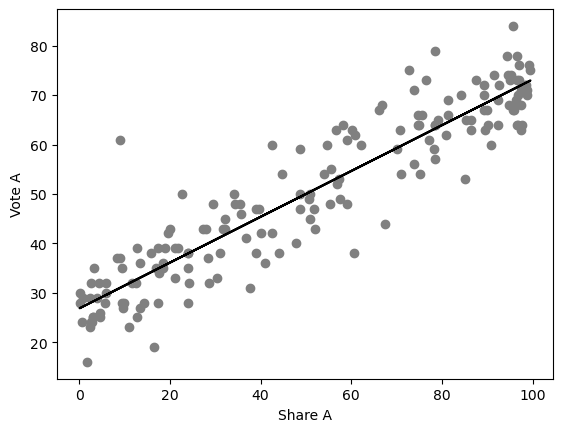

In [28]:
# Extract data
vote1 = woo.dataWoo('vote1')

# Modeling
model = smf.ols(formula='voteA ~ shareA', data=vote1).fit()

# Get params
params = model.params
print("Parameters:")
print(params)

# Plot scatter
y_fitted = model.fittedvalues
plt.plot('shareA', 'voteA', data=vote1, color='grey', marker='o', linestyle='')
plt.plot(vote1['shareA'], y_fitted, color='black', linestyle='-')
plt.ylabel('Vote A')
plt.xlabel('Share A')
plt.show()